In [26]:
import pandas as pd
import matplotlib.pyplot as plt
A=pd.read_csv("C:/Users/Ashish/Desktop/DataScience/Datasets/ts.csv",names=["year","passengers"])
A.head(20)

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


Text(0, 0.5, 'No of passangers travelled')

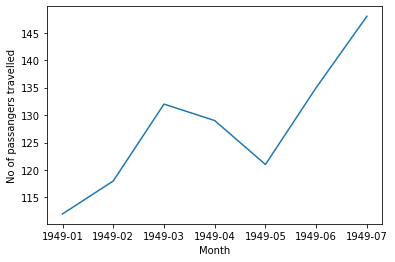

In [21]:

B = A[0:7]
plt.plot(B.year,B.passengers)
plt.xlabel("Month")
plt.ylabel("No of passangers travelled")


In [27]:
B

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


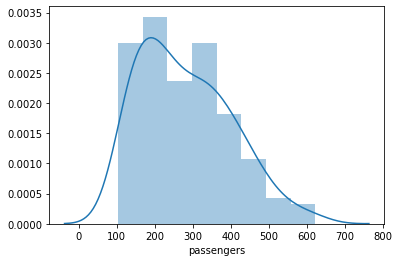

In [22]:

import seaborn as sb
sb.distplot(A.passengers)


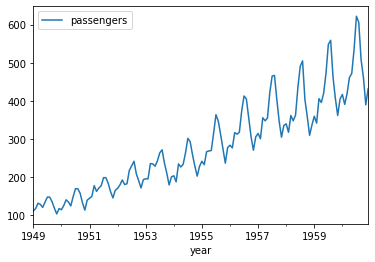

In [28]:

A.index=A.year

A = A.drop(labels=["year"],axis=1)
A.index = pd.to_datetime(A.index,format="%Y-%m")
A.plot()


In [29]:
A

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Components:(Trend, Season, Error[randomness])


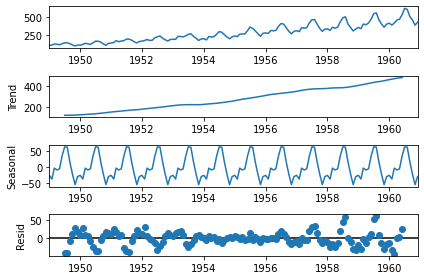

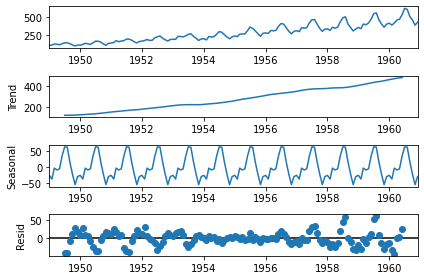

In [25]:

from statsmodels.api import tsa
tsa.seasonal_decompose(A).plot()

In [95]:
B=pd.read_csv("C:/Users/Ashish/Desktop/DataScience/Datasets/Worksheet.csv",names=["Item","qty"])


In [96]:
B["Date"]=B.index
B.index=B["Date"]
B = B.drop(labels=["Date"],axis=1)
B.index = pd.to_datetime(B.index,format="%Y-%m")
#B.plot()
B.head(5)

,Item,qty
Date,,
1949-11-01,fries,104
1949-12-01,Burger,118
1950-01-01,Allo tikki,115
1950-02-01,fries,126
1950-03-01,Burger,141


In [97]:
import pandasql as ps

B = ps.sqldf("select Date,Item,SUM(qty) as nsold from B group by Date,Item",locals())

In [98]:

#B.index = pd.to_datetime(B.index,format="%Y-%m")

C=B[B.Item=="Allo tikki"][["Date","nsold"]]

C

,Date,nsold
2,1950-01-01 00:00:00.000000,115
5,1950-04-01 00:00:00.000000,135
8,1950-07-01 00:00:00.000000,170
11,1950-10-01 00:00:00.000000,133
14,1951-01-01 00:00:00.000000,145
17,1951-04-01 00:00:00.000000,163
20,1951-07-01 00:00:00.000000,199
22,1951-09-01 00:00:00.000000,184
25,1951-12-01 00:00:00.000000,166
27,1952-02-01 00:00:00.000000,180


In [86]:

tsa.seasonal_decompose(C).plot()

ValueError: x must have 2 complete cycles requires 8 observations. x only has 7 observation(s)